Saving brain_stroke_encoded.csv to brain_stroke_encoded (1).csv
CSV Loaded
    gender  age  hypertension  heart_disease  ever_married  work_type  \
0        1   67             0              1             1          1   
1        1   80             0              1             1          1   
2        0   49             0              0             1          1   
3        0   79             1              0             1          2   
4        1   81             0              0             1          1   
5        1   74             1              1             1          1   
6        0   69             0              0             0          1   
7        0   78             0              0             1          1   
8        0   81             1              0             1          1   
9        0   61             0              1             1          0   
10       0   54             0              0             1          1   
11       0   79             0              1     

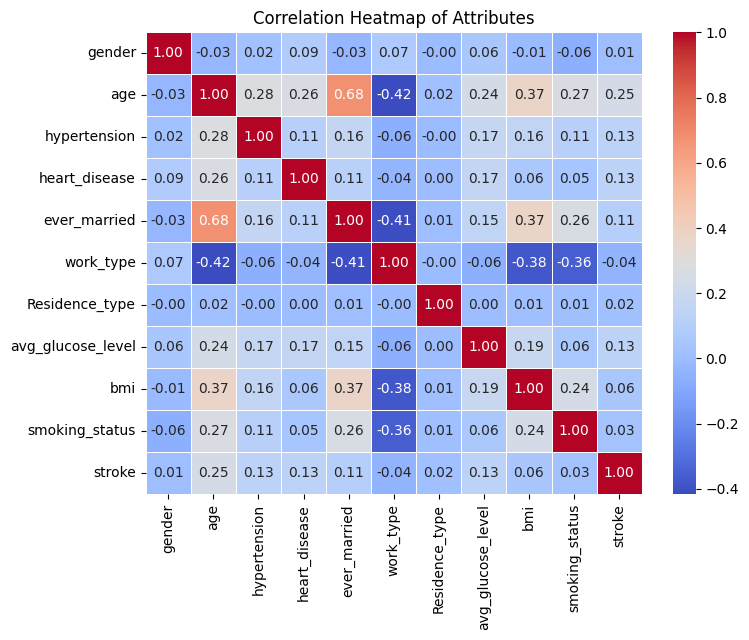

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv('brain_stroke_encoded.csv')
print('CSV Loaded')
print(df.head(20))

# Optional: drop non-numeric columns if any
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Attributes')
plt.show()


In [ ]:
# Split features (X) and label (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.945838,0.000000,0.000000,0.000000
1,Decision Tree,0.919759,0.217391,0.185185,0.200000
2,Random Forest,0.940822,0.000000,0.000000,0.000000
3,KNN,0.941825,0.166667,0.018519,0.033333
4,SVM,0.945838,0.000000,0.000000,0.000000
